In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Cleaned_Algerian_forest_fires_dataset.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [3]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [4]:
# drop unwanted columns
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [5]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [6]:
# encoding the classes columns
df['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [10]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [12]:
df['Classes'].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [13]:
# independent and dependent variable
# x have all columns except FWI and y has only one columns FWI
x = df.drop(['FWI'], axis = 1)
y = df['FWI']

In [16]:
x.head()
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
238    6.5
239    0.0
240    0.2
241    0.7
242    0.5
Name: FWI, Length: 243, dtype: float64

In [17]:
# train test split
from sklearn.model_selection import train_test_split     
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [22]:
x_train.shape , x_test.shape

((182, 11), (61, 11))

In [23]:
y_train.shape , y_test.shape

((182,), (61,))

In [24]:
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


In [ ]:
# check for multicollinearity --> independent feature cannot be much correalted based on threshold value

<Axes: >

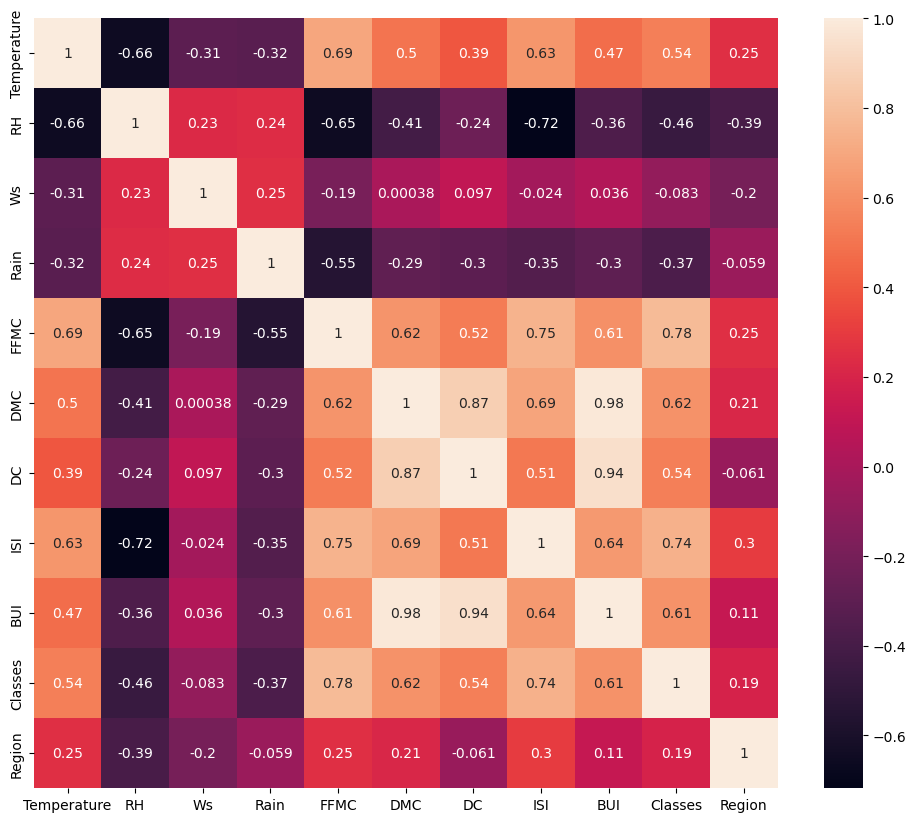

In [26]:
plt.figure(figsize = (12,10))
corr = x_train.corr()
sns.heatmap(corr, annot = True)

In [28]:
def correlation(dataset , threshold):
    corr_set = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                col_name = corr_matrix.columns[i]
                corr_set.add(col_name)
    return corr_set             

In [30]:
# set threshold
high_corr = correlation(x_train, 0.85)

In [31]:
# drop high correalted columns
x_train.drop(high_corr , axis = 1,inplace = True)
x_test.drop(high_corr, axis = 1, inplace = True)

In [32]:
x_train.shape , x_test.shape

((182, 9), (61, 9))

In [34]:
# feature scaling and standardization
from sklearn.preprocessing import StandardScaler

In [35]:
ss = StandardScaler()
x_train_scaler = ss.fit_transform(x_train)
x_test_scaler = ss.transform(x_test)

C:\Users\Hp\AppData\Local\Temp\ipykernel_15448\3804916601.py:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


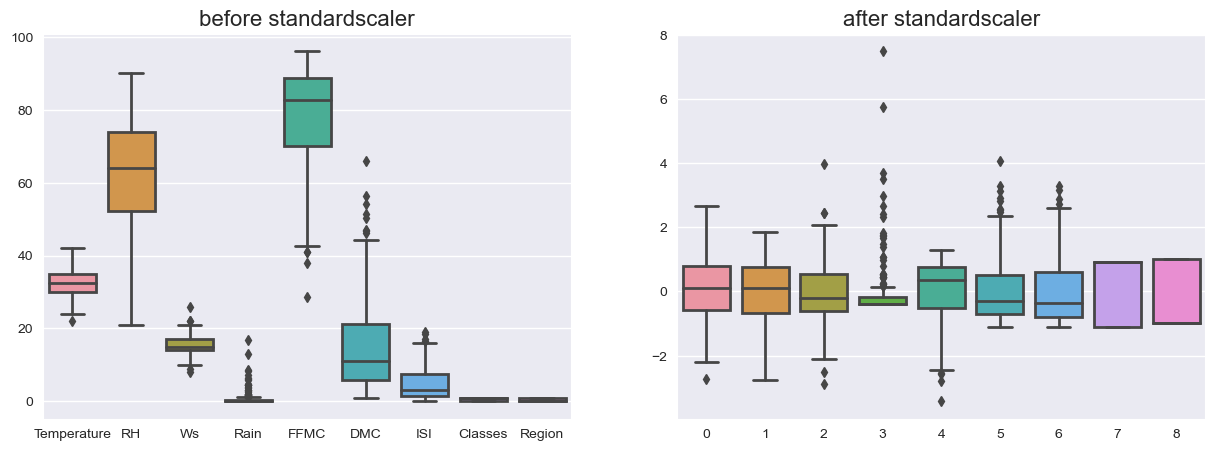

In [44]:
# box plot to understand the impact of standard scaler
plt.subplots(figsize = (15,5))
plt.subplot(1,2,1)
sns.boxplot(data = x_train)
plt.title("before standardscaler")
plt.subplot(1,2,2)
sns.boxplot(data = x_train_scaler)
plt.title("after standardscaler")
plt.style.use('Solarize_Light2')
sns.set_style('darkgrid')

In [ ]:
# linear Regression model

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [47]:
linreg = LinearRegression()
linreg.fit(x_train_scaler, y_train)

LinearRegression()

In [57]:
y_pred = linreg.predict(x_test_scaler)
y_pred

array([ 8.22340505e+00,  7.75252922e+00, -2.54117416e-01,  4.35589319e+00,
        6.69135945e+00,  1.36202538e+00,  2.03864111e+00,  7.79328670e+00,
        1.72547890e+00,  3.33158516e+00,  4.13723043e-01,  9.75001593e+00,
        9.33180880e+00,  1.70522541e+01,  1.85133518e+01,  1.24250301e+00,
        1.85818589e+00, -2.19341618e-02,  7.18794479e+00,  3.06137615e+00,
        1.43702876e+00,  2.31135272e-01,  6.57677437e+00,  3.31761969e-01,
        2.10846121e+01,  5.11915298e+00,  5.93220317e+00,  9.80969813e+00,
       -6.46764212e-02,  9.81330986e+00,  6.64475980e+00, -4.53909646e-01,
        1.04015941e+01,  1.45820244e+01,  1.47807316e+00,  4.33773546e-01,
        2.04109845e+00,  6.08454570e+00, -4.65467631e-01, -3.05185642e-01,
        6.68439528e+00,  1.79727675e+00,  8.59237254e+00, -2.66715046e-01,
        1.54439592e+01,  8.32647113e+00,  8.25849719e+00,  1.42038134e+00,
        1.29740729e+01,  1.21912915e+00,  2.95190998e+01,  5.55199228e+00,
        1.72874204e+01,  

In [58]:
mae = mean_absolute_error(y_pred, y_test)
r2s = r2_score(y_pred , y_test)
mae, r2s

(0.5468236465249993, 0.9839977157632893)

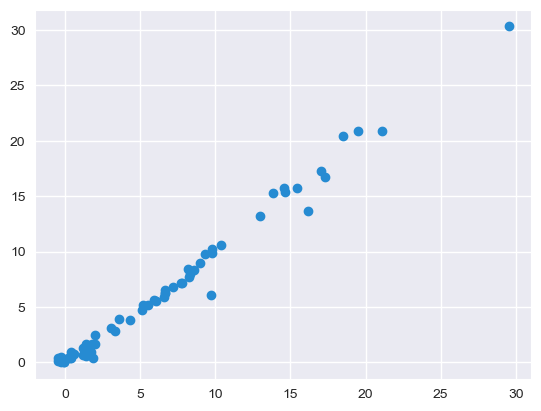

In [59]:
plt.scatter(y_pred, y_test)

In [ ]:
# lasso regression 

In [87]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score
lasso = Lasso()
lasso.fit(x_train_scaler, y_train)
y_pred = lasso.predict(x_test_scaler)
mae = mean_absolute_error(y_pred, y_test)
r2s = r2_score(y_pred , y_test)
mae, r2s

(1.1331759949144085, 0.9264742326805692)

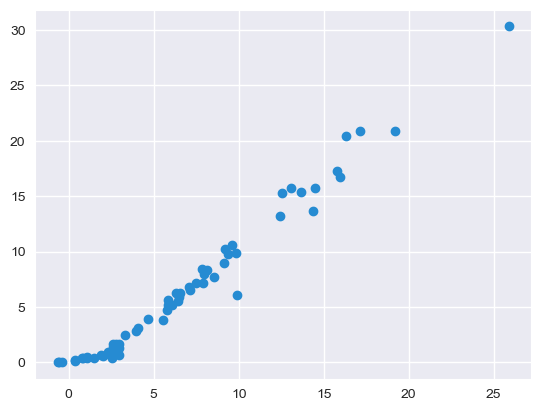

In [88]:
plt.scatter(y_pred, y_test)

In [89]:
# ridge regression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score
ridge = Ridge()
ridge.fit(x_train_scaler, y_train)
y_pred = ridge.predict(x_test_scaler)
mae = mean_absolute_error(y_pred, y_test)
r2s = r2_score(y_pred , y_test)
mae, r2s

(0.5642305340105717, 0.9834070933284211)

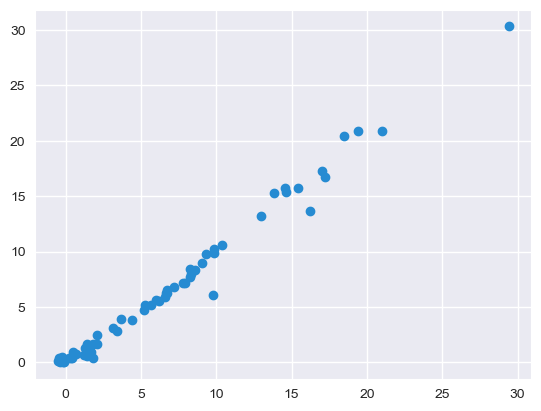

In [90]:
plt.scatter(y_pred, y_test)

In [91]:
# ElasticNet regression
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, r2_score
elastic = ElasticNet()
elastic.fit(x_train_scaler, y_train)
y_pred = elastic.predict(x_test_scaler)
mae = mean_absolute_error(y_pred, y_test)
r2s = r2_score(y_pred , y_test)
mae, r2s

(1.8822353634896, 0.7814447243400926)

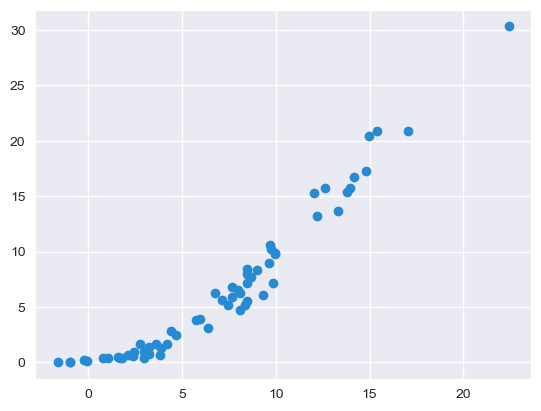

In [92]:
plt.scatter(y_pred, y_test)

In [107]:
# cross validation lasso
from sklearn.linear_model import LassoCV
lcv = LassoCV(cv = 5)
lcv.fit(x_train_scaler, y_train)

LassoCV(cv=5)

In [108]:
lcv.predict(x_test_scaler)

array([ 8.17490595,  7.68312478, -0.25676525,  4.72643402,  6.78715772,
        1.77624325,  2.23148094,  7.64057821,  1.99176323,  3.39941035,
        0.62808928,  9.95945488,  9.36168319, 16.98503659, 18.28488762,
        1.61644108,  1.62751276, -0.6415713 ,  7.28510526,  3.10926518,
        1.95541903,  0.18069335,  6.47563129,  0.14318503, 20.99597009,
        5.11755206,  5.86208849,  9.75914403, -0.77037467,  9.91838577,
        6.72277075, -0.31776007, 10.31109643, 14.4365551 ,  1.71022677,
        0.83439752,  2.03414915,  5.97488529, -0.6263644 , -0.56200288,
        6.47253729,  2.07971408,  8.46741557, -0.8464481 , 15.40443856,
        8.32941189,  8.48782486,  1.44030355, 13.02752812,  1.20911545,
       29.08623849,  5.49737681, 17.15937199, 19.28890096, 13.71102991,
       16.05355549,  0.99056448,  9.0873725 ,  3.84455993, 14.43991192,
        5.23034139])

In [109]:
lcv.alpha_

0.05725391318234408

In [110]:
lcv.alphas_

array([7.05853002, 6.58280872, 6.13914944, 5.72539132, 5.33951911,
       4.97965339, 4.64404142, 4.33104857, 4.03915039, 3.76692517,
       3.51304702, 3.27627941, 3.05546914, 2.84954075, 2.65749124,
       2.47838523, 2.31135036, 2.15557308, 2.01029467, 1.87480753,
       1.74845178, 1.63061198, 1.52071419, 1.41822315, 1.32263965,
       1.23349817, 1.15036452, 1.0728338 , 1.00052839, 0.93309613,
       0.87020857, 0.81155943, 0.75686304, 0.705853  , 0.65828087,
       0.61391494, 0.57253913, 0.53395191, 0.49796534, 0.46440414,
       0.43310486, 0.40391504, 0.37669252, 0.3513047 , 0.32762794,
       0.30554691, 0.28495408, 0.26574912, 0.24783852, 0.23113504,
       0.21555731, 0.20102947, 0.18748075, 0.17484518, 0.1630612 ,
       0.15207142, 0.14182231, 0.13226397, 0.12334982, 0.11503645,
       0.10728338, 0.10005284, 0.09330961, 0.08702086, 0.08115594,
       0.0756863 , 0.0705853 , 0.06582809, 0.06139149, 0.05725391,
       0.05339519, 0.04979653, 0.04644041, 0.04331049, 0.04039

In [99]:
# lcv.mse_path_

In [111]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred1 = lcv.predict(x_test_scaler)

In [112]:
mae = mean_absolute_error(y_pred1, y_test)
r2s = r2_score(y_pred1 , y_test)
mae, r2s

(0.6199701158263432, 0.980851982434192)

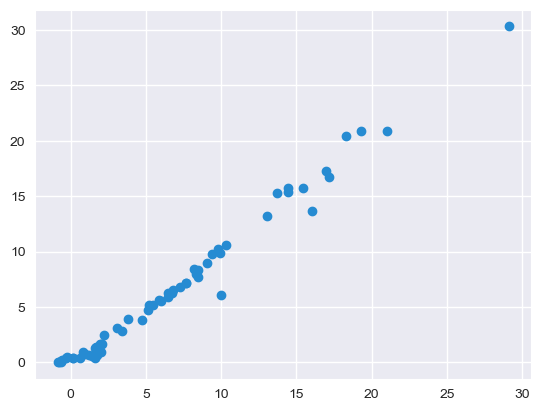

In [114]:
plt.scatter(y_pred , y_test)

In [ ]:
# cross validation for ridge

In [136]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_absolute_error, r2_score
rcv = RidgeCV(cv=5)
rcv.fit(x_train_scaler, y_train)
y_pred2 = rcv.predict(x_test_scaler)
mae = mean_absolute_error(y_pred2, y_test)
r2s = r2_score(y_pred2 , y_test)
mae, r2s

(0.5642305340105717, 0.9834070933284211)

In [137]:
rcv.alpha_

1.0

In [138]:
rcv.alphas

(0.1, 1.0, 10.0)

In [139]:
rcv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

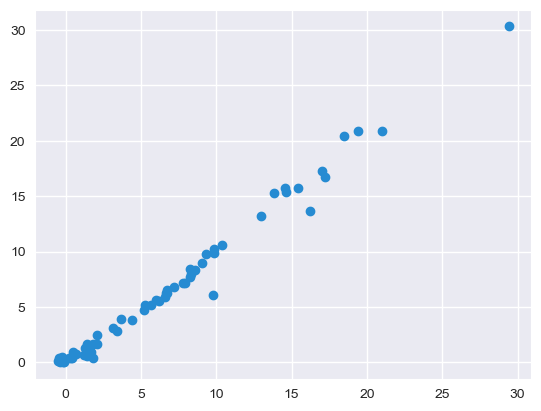

In [140]:
plt.scatter(y_pred2, y_test)

In [134]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_absolute_error, r2_score
encv = ElasticNetCV(cv=5)
encv.fit(x_train_scaler, y_train)
y_pred3 = encv.predict(x_test_scaler)
mae = mean_absolute_error(y_pred3, y_test)
r2s = r2_score(y_pred3 , y_test)
mae, r2s

(0.6575946731430905, 0.9799084998743879)

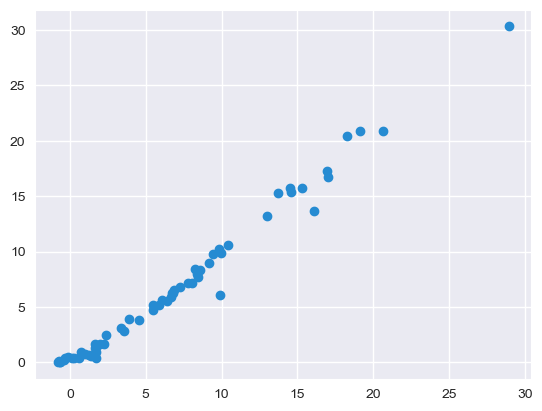

In [135]:
plt.scatter(y_pred3, y_test)

In [141]:
encv.alpha_

0.04311146156383891

In [145]:
encv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11